# Rates of convergence 
# (compare with Lec 6)


### Definition 

Suppose $\{\beta_n\}_{n=1}^\infty$, $\beta_n > 0$ is a sequence known to converge to zero, and $\{\alpha_n\}_{n=1}^\infty$ converges to a number $\alpha$.  If a positive constant $K$ exists such that

$$ |\alpha_n - \alpha| \leq K \beta_n, $$

the we say that $\{\alpha_n\}_{n=1}^\infty$ converges to $\alpha$ with __rate__ (or __order__) $O(\beta_n)$.

In this case we also write

$$ \alpha_n = \alpha + O(\beta_n)$$

to indicate that the error decays like $\beta_n$.

### Example

Consider $\displaystyle \alpha_n = \frac{n+1}{n+2}$.  Then, we know that $\alpha_n \to 1$ as $n \to \infty$.  Find the rate of convergence.  

We can also talk about order of convergence when we do not have a sequence:

###  Definition

Suppose that for a positive function $g(h) > 0$ we have $\lim_{h\to 0} g(h) = 0$.  We say that $f(h)$ converges to $L$ at $O(g(h))$ (equiv. $f(h) = L + O(g(h))$) if

$$ |f(h) - L| \leq K g(h) $$

for some positive constant K.

### Example

An approximation to the derivative of $\sin(x)$ at $x = 0$ is given by

$$ f(h) = \frac{\sin(h) - \sin(0)}{h}. $$

Show that $f(h) = 1 + O(h^2)$.  

# Root-finding problem 

Given a continuous function $f$, we want to find points $x$ (called roots) where $f(x) = 0$.  

Assume $f \in C[a,b]$ and $f(a) < 0$ and $f(b) > 0$.  The case where $f(a) > 0$ and $f(b) < 0$ is analogous.  What we really require here is that $f(a)f(b) < 0$.

From the intermediate value theorem, we are guaranteed to have at least one (could be many!) value $c$ such that $f(c) = 0$.  



# A function whose root we will compute

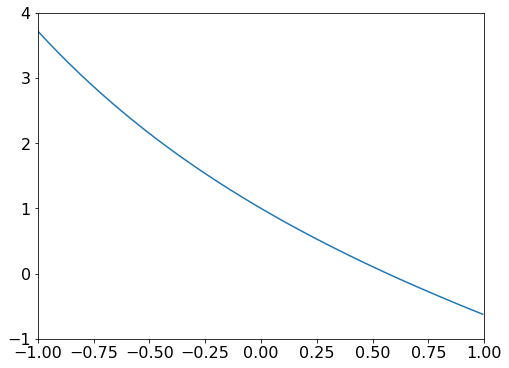

In [1]:
import numpy as np 
from draw import graph_function

f = lambda x: np.exp(-x) - x
graph_function(f, y2=4)

# Bisection Method

We have that $f(a)f(b) < 0$.  Set $a_1 = a$ and $b_1 = b$.  Let $p_1  = (a_1+b_1)/2$.

Then we look at the sign of $f(a)f(p_1)$.  

* If $f(a)f(p_1) < 0$ then $f$ must have a root between $a$ and $p_1$.
* If $f(a)f(p_1) > 0$ then $f$ must have a root between $p_1$ and $b$.

After this process, we've narrowed our search for a root from the interval $[a,b]$ (has length $b-a)$) to either the interval

$$ \left[a, \frac{a+b}{2} \right] \quad \text{or} \quad \left[ \frac{a+b}{2}, b \right].$$

These both have lengths $(b-a)/2$.  Assume $f(a)f(p_1) < 0$.  Then set $a_2 = a_1, b_2 = p_1, p_2 = (a_2+b_2)/2$ and repeat.

# Error Analysis 

We will now determine the order of convergence of the Bisection method.  In the algorithm we take $p_n$ (the definition of $p$ in the $n$th iteration) to be the approximation of the root:

$$ p_1 = \frac{a+b}{2}. $$

Let $p^*$ be the actual root.  We then estimate

$$ |p_1 - p^*| \leq \frac{b-a}{2}.$$

So, the error in one step the bisection algorithm is bounded by half of the length of the interval that is being searched.

In the second step of the Bisection method we search an interval of length $(b-a)/2$ and so

$$ |p_2 - p^*| \leq \frac{b-a}{4} = \frac{b-a}{2^2}.$$

From this, the general formula follows:

#### Theorem

Suppose that $f \in C[a,b]$ and $f(a)\cdot f(b) < 0$.  The Bisection method generates a sequence $\{p_n\}_{n=1}^\infty$, approximating a root $p^*$ such that

$$ |p_n - p^*| \leq \frac{b-a}{2^n}.$$

Said another way, $p_n = p + O(2^{-n})$.

Later we will consider other root-finding algorithms that converge faster. 

# Bisection Method in code

In [6]:
from bisection import different_sign, print_heading, print_row

def bisection(func, low, high, n_max):
    'Find root of continuous function where f(low) and f(high) have opposite signs'

    assert different_sign(func(low), func(high))

    print_heading() 
    
    for i in range(n_max):
        midpoint = (low + high) / 2.0
        print_row(func, low, high, midpoint)
        if different_sign(func(low), func(midpoint)):
            high = midpoint
        else:
            low = midpoint

    return midpoint

# Bisection method in action

In [7]:
root = bisection(f, -1, 1, 10)

a_n		 b_n		 p_n		 f(p_n)
-1.000000	 1.000000	 0.000000	 1.000000	
0.000000	 1.000000	 0.500000	 0.106531	
0.500000	 1.000000	 0.750000	 -0.277633	
0.500000	 0.750000	 0.625000	 -0.089739	
0.500000	 0.625000	 0.562500	 0.007283	
0.562500	 0.625000	 0.593750	 -0.041498	
0.562500	 0.593750	 0.578125	 -0.017176	
0.562500	 0.578125	 0.570312	 -0.004964	
0.562500	 0.570312	 0.566406	 0.001155	
0.566406	 0.570312	 0.568359	 -0.001905	
